<a href="https://colab.research.google.com/github/freha-mezzoudj/Fast-Computation/blob/main/store_fastFood_Image_cnnV3_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from zipfile import ZipFile
file_name = "logoDataFastFood.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019) 
import time

In [10]:
!pip install ipython ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext autotime

Testing for GPU

You can easily check if the GPU is enabled by executing the following code −

In [15]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [17]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7354601342427340308
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14415560704
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6616598124812974073
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!cat /proc/cpuinfo

In [19]:
!cat /proc/gpuinfo

cat: /proc/gpuinfo: No such file or directory


In [ ]:
!cat /proc/meminfo

#Classification Code 

https://github.com/chetanstpt/Fast-food-Image-detection/blob/main/FastFoodStore_Classification_CNN_Final%20(1).ipynb

#CNN Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), # Flattening transforms a two-dimensional matrix of features into a vector of features           
    
    tf.keras.layers.Dense(550,activation="relu"), #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax") #Adding the Output Layer
])


In [21]:
%unload_ext autotime

The autotime extension is not loaded.


The Summary of the model: 

In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 64)      

The paramters of the model:

In [26]:
%%time
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

adam=Adam(lr=0.001)
model.compile(optimizer='adam',   #Optimiser  used to reduce the cost calculated by cross-entropy
              loss='categorical_crossentropy', #the loss function used to calculate the error
              metrics = ['acc'])     #the metrics used to represent the efficiency of the model


CPU times: user 7.61 ms, sys: 0 ns, total: 7.61 ms
Wall time: 7.56 ms


Training and validation data:

In [39]:
%%time
bs=30         #Setting batch size
    
train_dir = "logoDataFastFood/train/"  #Setting training directory
validation_dir = "logoDataFastFood/test/"  #Setting testing directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=bs,
                                                    class_mode='categorical',
                                                    target_size=(180,180))     

# Flow validation images in batches of 20 using test_datagen generator

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))


Found 1465 images belonging to 5 classes.
Found 893 images belonging to 5 classes.
CPU times: user 98.9 ms, sys: 21.5 ms, total: 120 ms
Wall time: 94.1 ms


Fitting the model:

In [40]:
%%time
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=50,
                    validation_steps=50 // bs,
                    verbose=2)


Epoch 1/50
5/5 - 1s - loss: 0.0154 - acc: 0.9933 - val_loss: 1.4657 - val_acc: 0.8000 - 728ms/epoch - 146ms/step
Epoch 2/50
5/5 - 1s - loss: 0.0178 - acc: 0.9933 - val_loss: 2.7851 - val_acc: 0.7333 - 807ms/epoch - 161ms/step
Epoch 3/50
5/5 - 1s - loss: 0.0722 - acc: 0.9933 - val_loss: 2.7491 - val_acc: 0.7000 - 762ms/epoch - 152ms/step
Epoch 4/50
5/5 - 1s - loss: 0.1219 - acc: 0.9800 - val_loss: 2.3382 - val_acc: 0.6667 - 760ms/epoch - 152ms/step
Epoch 5/50
5/5 - 1s - loss: 0.0102 - acc: 0.9933 - val_loss: 1.4164 - val_acc: 0.7333 - 648ms/epoch - 130ms/step
Epoch 6/50
5/5 - 1s - loss: 0.0457 - acc: 0.9733 - val_loss: 1.2107 - val_acc: 0.7667 - 552ms/epoch - 110ms/step
Epoch 7/50
5/5 - 1s - loss: 0.0443 - acc: 0.9800 - val_loss: 1.5201 - val_acc: 0.6333 - 713ms/epoch - 143ms/step
Epoch 8/50
5/5 - 1s - loss: 0.0135 - acc: 0.9933 - val_loss: 1.2581 - val_acc: 0.6667 - 722ms/epoch - 144ms/step
Epoch 9/50
5/5 - 1s - loss: 0.0126 - acc: 0.9933 - val_loss: 2.5222 - val_acc: 0.6667 - 681ms/ep

Try with other parametrs!

In [28]:
model.save('Final_model_cnnV2.h5')

In [41]:
import pandas as pd
lc = pd.DataFrame(history.history)
lc

,loss,acc,val_loss,val_acc
0,0.015408,0.993333,1.465670,0.800000
1,0.017806,0.993333,2.785084,0.733333
2,0.072203,0.993333,2.749067,0.700000
3,0.121885,0.980000,2.338236,0.666667
4,0.010229,0.993333,1.416377,0.733333
5,0.045720,0.973333,1.210749,0.766667
6,0.044259,0.980000,1.520129,0.633333
7,0.013467,0.993333,1.258107,0.666667
8,0.012558,0.993333,2.522230,0.666667
9,0.023621,0.993333,1.495236,0.800000


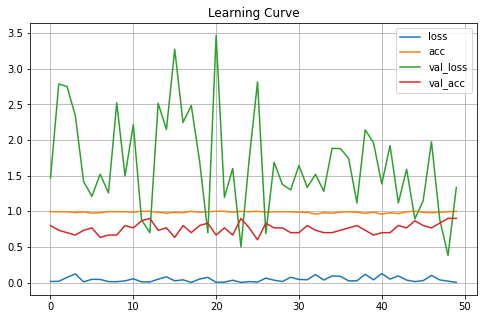

In [42]:
lc.plot(figsize=(8,5))
plt.title("Learning Curve")
plt.grid()